In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm,preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score

In [2]:
df_org = pd.read_excel('/content/drive/MyDrive/Machine Learning/Datasets/Major Project Dataset (Wine Classification).xlsx')

In [3]:
df = df_org
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [4]:


df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [5]:
# Remove any null values present.
# Since there are only a few samples with null values, we are gonna delete these rows.
df.dropna(inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   float64
dtypes: float64(12)
memory usage: 162.1 KB


In [7]:
# Since 'quality' is the targeted variable, we need to find in which category a wine composition will fall into.
unique=df['quality'].unique()
print(unique)

[5. 6. 7. 4. 8. 3.]


**Exploratory Data Analysis with Visualisation:**

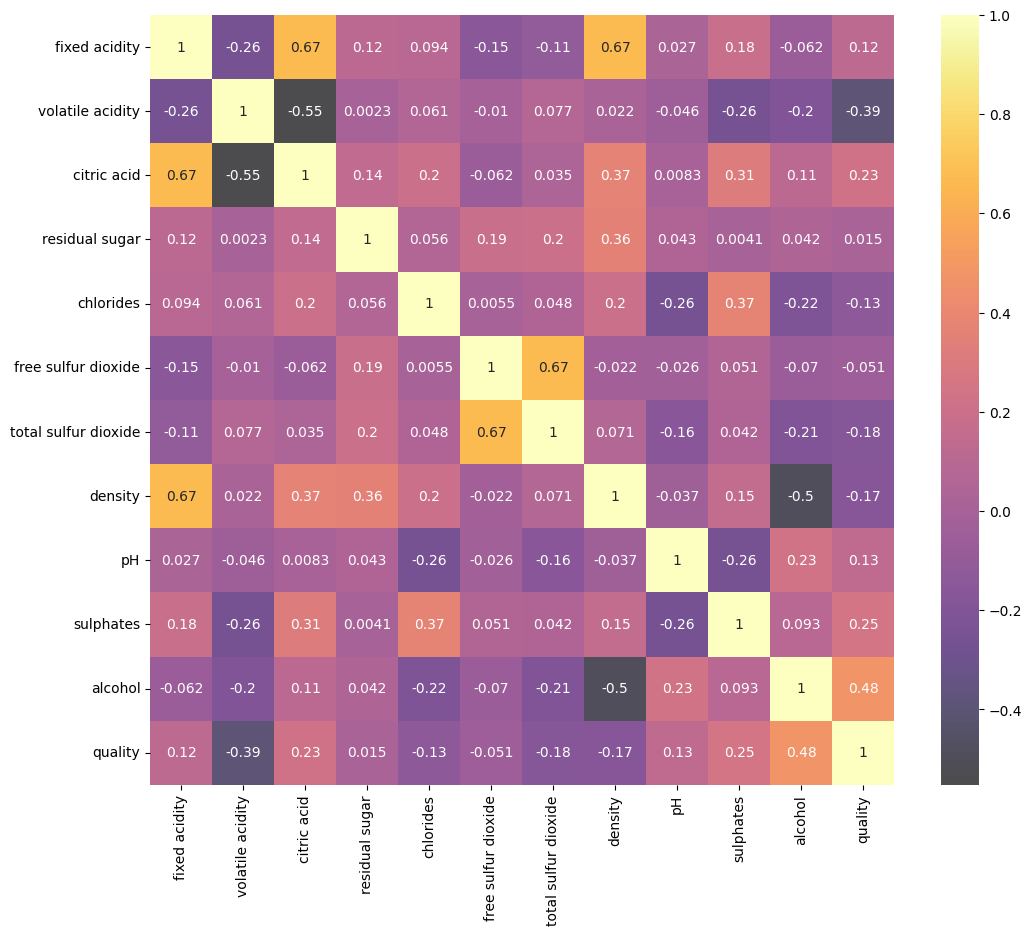

In [8]:
# Heatmaps perform well at visualising the correlation between multiple variables, which makes easy for developers to identify highly correlated variables.
# Calculate correlation matrix representing the correlation between the variables.
correlation_matrix = df.corr()

# Creating the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, cmap='inferno', annot=True, alpha=0.7)
plt.show()

In [9]:
# Rename variables with descriptive names
input_data = df.drop(columns= 'quality', axis=1)
label = df['quality']

**Outcome of the analysis:**
1. Null values in the dataset are removed.
2. Feature 'quality' is the target variable.
3. It's a multiclassification problem since the target values are [5. 6. 7. 4. 8. 3.]

**Data Preprocessing:**

In [10]:
# Oversampling the data.
# Oversampling is a technique used to resolve the imbalance the minority class through replication, while in contrast undersampling is used to reduce the samples that over represented the majority classes.
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
features, labels=  oversample.fit_resample(df.drop(['quality'],axis=1),df['quality'])

In [11]:
# Scales each feature in the dataset to a range of 0 to 1.
scaler = preprocessing.MinMaxScaler()
names = features.columns
scaled_df = pd.DataFrame(scaler.fit_transform(features), columns = names)
scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.663793,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.396552,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.448276,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.362069,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.663793,0.137725,0.153846


In [12]:
# Splitting the dataset into testing and training with 1/4th data as test data
X_train, X_test, y_train, y_test=train_test_split(scaled_df, labels, test_size = 0.25,random_state = None, shuffle = True)

In [13]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest : ", rf_accuracy)

# --------------------------------------------------Support Vector Machine----------------------------------------------------------------------

# Create and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)  # Replace 'rbf' with your desired kernel
svm_model.fit(X_train, y_train)

# Make predictions on the test set
svm_y_pred = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("Accuracy of Support Vector Machine : ", svm_accuracy)

#--------------------------------------------------Logistic Regression---------------------------------------------------------------------------

# Create and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42)  # Adjust hyperparameters as needed
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_y_pred = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_y_pred)
print("Accuracy of Logistic Regression : ", lr_accuracy)

# -------------------------------------------------K- Nearest Neighbors--------------------------------------------------------------------------

# Define the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Set the number of neighbors (k)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
knn_y_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("Accuracy of KNN : ", knn_accuracy)

# Define the Decision Tree model.
dt_model = DecisionTreeClassifier()

# Train the model.
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy of Decision Tree : ", dt_accuracy)



Accuracy of Random Forest :  0.8714425907752699
Accuracy of Support Vector Machine :  0.6918547595682041
Accuracy of Logistic Regression :  0.5318940137389597
Accuracy of KNN :  0.7909715407262021
Accuracy of Decision Tree :  0.7801766437684003


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


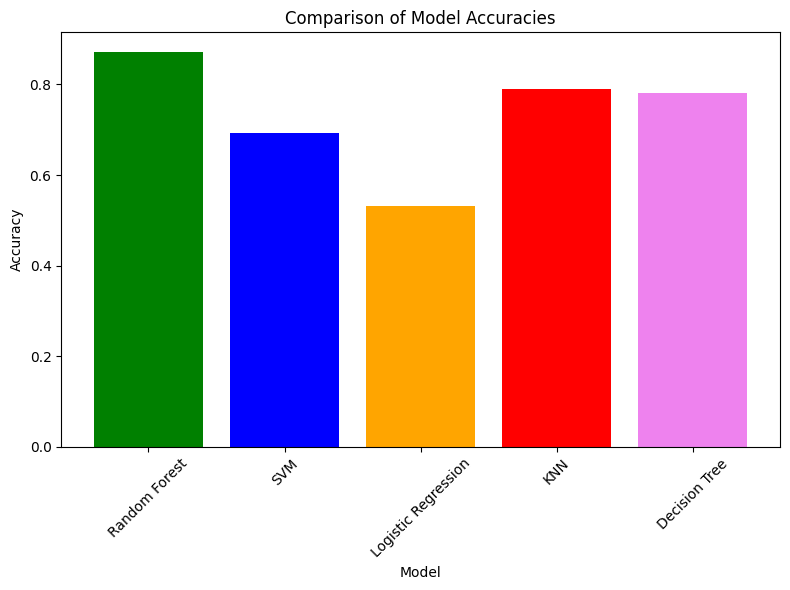

In [14]:
model_names = ["Random Forest", "SVM", "Logistic Regression","KNN", "Decision Tree"]  # Replace with your actual model names

# Check and convert data types if necessary
accuracies = [rf_accuracy,svm_accuracy,lr_accuracy,knn_accuracy, dt_accuracy]
if not all(isinstance(x, (int, float)) for x in accuracies):
    try:
        accuracies = [float(x) for x in accuracies]  # Convert to float if possible
    except ValueError:
        print("Error: Accuracies must be numerical values.")
        exit()

# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(model_names, accuracies, color=['green', 'blue', 'orange','red', 'Violet'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show or save the chart
plt.show()

**Data Modelling considering the Hyper Parameters of the Classifiers**

**Classification Using Random Forest Classifier and comparing the accuracy of the classifier with different values of the hyperparameters (considered are n_estimator, max_depth)**

In [15]:
# Classification using Random Forest classifier.

# Create and train the Random Forest model
RF_graph = pd.DataFrame(columns = ['n_estimators', 'max_depth', 'accuracy'])
for i in range(1, 5):
  for j in range(1, 5):
    rf_model = RandomForestClassifier(n_estimators = 100*i, criterion = 'gini', max_depth = 2+j, random_state = 32)
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Find the accuracy of the Random Forest Model
    accuracy = accuracy_score(y_test, y_pred)

    new_row = {
        'n_estimators': 100*i,
        'max_depth': 2+j,
        'accuracy': accuracy
    }
    RF_graph.loc[len(RF_graph.index)] = new_row
    # print("Accuracy of the Random Forest Classifier with n_estimator = ", 100*i, ", max_depth = ", 2 + j, "is : ", accuracy)



RF_graph


,n_estimators,max_depth,accuracy
0,100,3,0.603533
1,100,4,0.656526
2,100,5,0.714426
3,100,6,0.765456
4,200,3,0.608440
5,200,4,0.660451
6,200,5,0.702650
7,200,6,0.758587
8,300,3,0.600589
9,300,4,0.663395


**Classification using Support Vector Machine classifier and comparing the accuracy using different hyperparameters(considered c, gamma)**

In [16]:
# Create and train the SVM model
svm_graph = pd.DataFrame(columns = ['gamma', 'C', 'accuracy'])
for i in range(1, 5):
  for j in range(1, 5):
    svm_model = svm.SVC(gamma = 0.02*i, C = 200*j, random_state=42)
    svm_model.fit(X_train, y_train)

    # Make predictions on the test set
    new_row = {
        'gamma': 0.02*i,
        'C': 200*j,
        'accuracy': accuracy_score(y_test, svm_model.predict(X_test))
    }
    svm_graph.loc[len(svm_graph.index)] = new_row
    svm_y_pred = svm_model.predict(X_test)
    svm_accuracy = accuracy_score(y_test, svm_y_pred)
    # print("Accuracy of the SVM classifier with gamma = ", 0.02 * i, ", C = ", 200*j,"is : ",svm_accuracy)

svm_graph

,gamma,C,accuracy
0,0.02,200,0.599607
1,0.02,400,0.624141
2,0.02,600,0.631992
3,0.02,800,0.639843
4,0.04,200,0.638862
5,0.04,400,0.647694
6,0.04,600,0.667321
7,0.04,800,0.674190
8,0.06,200,0.646712
9,0.06,400,0.681060


**Classification using Logistic Regression and comparing the accuracy with different hyperparameters (creating hyperparameter grid)**

In [17]:
# Instantiating logistic regression classifier
lr_model = linear_model.LogisticRegression()

# Creating the hyperparameter grid
param_grid = [{'C' : np.logspace(-4, 4, 20)}]

LR_graph = pd.DataFrame(columns = ['Cross Validation', 'accuracy'])
for i in range(0,4):
  # Instantiating the GridSearchCV object
  clf = GridSearchCV(lr_model, param_grid, cv = 2+i, verbose=True, n_jobs=-1)
  # Assuming df and label are your feature matrix and target variable
  # Fit the GridSearchCV object to the data
  best_clf = clf.fit(input_data, label)
  best_clf.best_estimator_

  new_row = {
      'Cross Validation': 2+i,
      'accuracy': best_clf.score(input_data,label)
  }
  LR_graph.loc[len(LR_graph.index)] = new_row

LR_graph

Fitting 2 folds for each of 20 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 4 folds for each of 20 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Cross Validation,accuracy
0,2,0.575815
1,3,0.575815
2,4,0.579574
3,5,0.573308


**Classification using K-Nearest Neighbor classifier and comparing the accuracy with different hyperparameter values (considered no. of neighbors)**

In [18]:
KNN_graph = pd.DataFrame(columns = ['neighbors', 'accuracy'])
for i in range(0, 5):
  # Define the KNN model
  knn_model = KNeighborsClassifier(n_neighbors= i + 3)

  # Train the model
  knn_model.fit(X_train, y_train)

  # Make predictions on the test set
  knn_y_pred = knn_model.predict(X_test)

  # Calculate the accuracy of the KNN model.
  knn_accuracy = accuracy_score(y_test, knn_y_pred)

  new_row = {"neighbors": i+3, "accuracy": knn_accuracy}
  KNN_graph.loc[len(KNN_graph.index)] = new_row
  # print("Accuracy of the KNN Classifier with no. of neighbors = ",i+3, ", is : ",knn_accuracy)

KNN_graph

,neighbors,accuracy
0,3,0.798822
1,4,0.784102
2,5,0.790972
3,6,0.780177
4,7,0.768400


**Classification using Decision Tree classifier with different values of max_depth :**

In [19]:
dt_graph = pd.DataFrame(columns = ['max_depth', 'accuracy'])
for i in range(4, 10):
  dt_model = DecisionTreeClassifier(max_depth = i)
  dt_model.fit(X_train, y_train)
  dt_pred = dt_model.predict(X_test)
  dt_accuracy = accuracy_score(y_test, dt_pred)
  new_row = {"max_depth": i, "accuracy": dt_accuracy}
  dt_graph.loc[len(dt_graph.index)] = new_row

dt_graph

,max_depth,accuracy
0,4,0.572130
1,5,0.641806
2,6,0.682041
3,7,0.698724
4,8,0.715407
5,9,0.740922
